In [1]:
import numpy as np

def polyinterp(t, y):

    n = len(t) - 1
    C = (t[-1] - t[0]) / 4  # scaling factor to ensure stability
    tc = t / C

    # Adding one node at a time, compute inverses of the weights.
    omega = np.ones(n + 1)
    for m in range(n):
        d = tc[: m + 1] - tc[m + 1]  # vector of node differences
        omega[: m + 1] = omega[: m + 1] * d  # update previous
        omega[m + 1] = np.prod(-d)  # compute the new one
    w = 1 / omega  # go from inverses to weights

    def p(x):
        # Compute interpolant.
        z = np.where(x == t)[0]
        if len(z) > 0:  # avoid dividing by zero
            # Apply L'Hopital's Rule exactly.
            f = y[z[0]]
        else:
            terms = w / (x - t)
            f = np.sum(y * terms) / np.sum(terms)
        return f

    return np.vectorize(p)

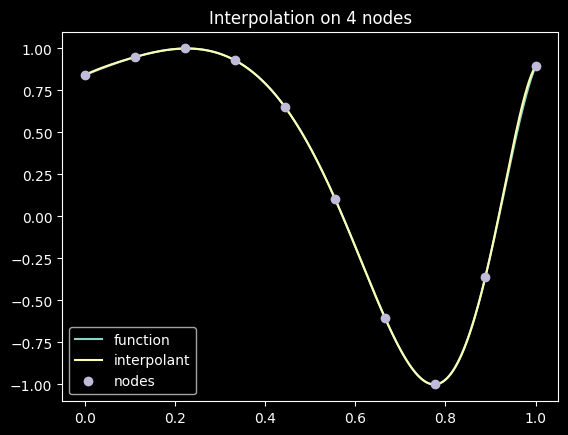

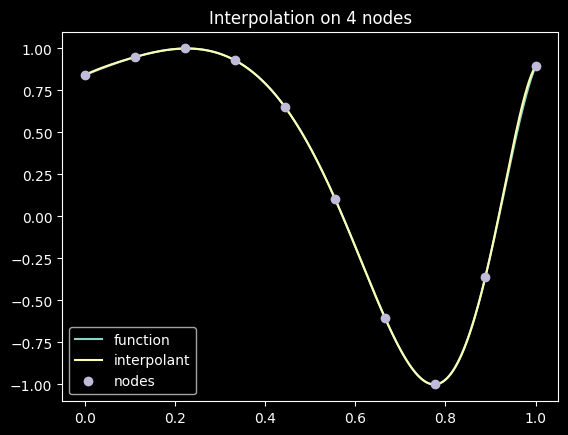

In [10]:
from numpy import *
from matplotlib.pyplot import *

f = lambda x: sin(exp(2 * x))
x = linspace(0, 1, 500)
fig, ax = subplots()
ax.plot(x, f(x), label="function")
t = linspace(0, 1, 10)
y = f(t)
p = polyinterp(t, y)

ax.plot(x, p(x), label="interpolant")
ax.plot(t, y, "o", label="nodes")
ax.legend()
ax.set_title("Interpolation on 4 nodes")
fig

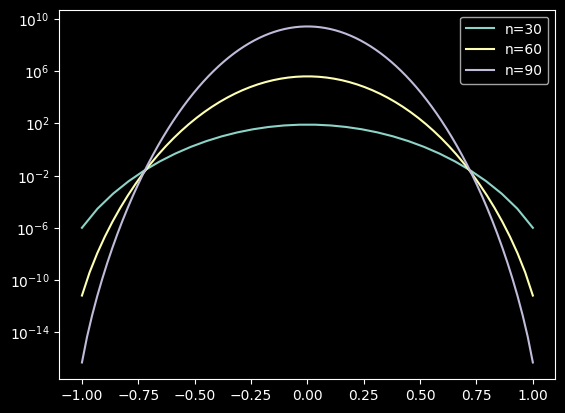

In [18]:
from numpy import *
from matplotlib.pyplot import *

n = np.array([30, 60, 90])

for i in n:
    t = linspace(-1, 1, i)
    C = (t[-1] - t[0]) / 4
    tc = t / C

    omega = np.ones(i)
    for m in range(i - 1):
        d = tc[: m + 1] - tc[m + 1]
        omega[: m + 1] = omega[: m + 1] * d
        omega[m + 1] = np.prod(-d)
    w = 1 / omega
    semilogy(t, abs(w))
legend(["n=30", "n=60", "n=90"])